In [3]:
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [4]:
# Load the CSV Data
df= pd.read_csv('../data/handlebar/Accelerometer_data_combined.csv')  # Load the CSV data using pandas
df



,Unnamed: 0,NTP,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
0,0,2024-07-24 10:26:01.863,1.417374,4.161118,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
1,1,2024-07-24 10:26:01.867,1.393433,4.161118,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
2,2,2024-07-24 10:26:01.872,1.407791,4.165909,8.762772,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
3,3,2024-07-24 10:26:01.877,1.446091,4.170700,8.781937,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
4,4,2024-07-24 10:26:01.884,1.417374,4.175491,8.753204,1.721817e+12,1.0,0.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465971,549101,2024-07-24 11:11:20.851,3.806778,2.609680,8.777145,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465972,549102,2024-07-24 11:11:20.857,3.758896,2.652771,8.681381,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465973,549103,2024-07-24 11:11:20.866,3.763687,2.796432,8.370132,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0
465974,549104,2024-07-24 11:11:20.870,3.734955,2.839523,8.307877,1.721819e+12,1.0,0.0,3.0,1.0,2.0,1.0,0.0


In [ ]:
#Convert 'NTP' to Datetime and Set as Index
df['NTP'] = pd.to_datetime(df['NTP'])
df.set_index('NTP', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 465976 entries, 2024-07-24 10:26:01.863000 to 2024-07-24 11:11:20.871000
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        465976 non-null  int64  
 1   Acc-X             464215 non-null  float64
 2   Acc-Y             464215 non-null  float64
 3   Acc-Z             465976 non-null  float64
 4   Timestamp_unix    465976 non-null  float64
 5   curb_activity     465976 non-null  float64
 6   curb_scene        465976 non-null  float64
 7   curb_height_down  465976 non-null  float64
 8   curb_height_up    465976 non-null  float64
 9   curb_type_down    465976 non-null  float64
 10  curb_type_up      465976 non-null  float64
 11  roughness         465976 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 46.2 MB


In [6]:
# Print unique values and their counts
counts = df['curb_scene'].value_counts()
counts


curb_scene
0.0    448753
1.0     17223
Name: count, dtype: int64

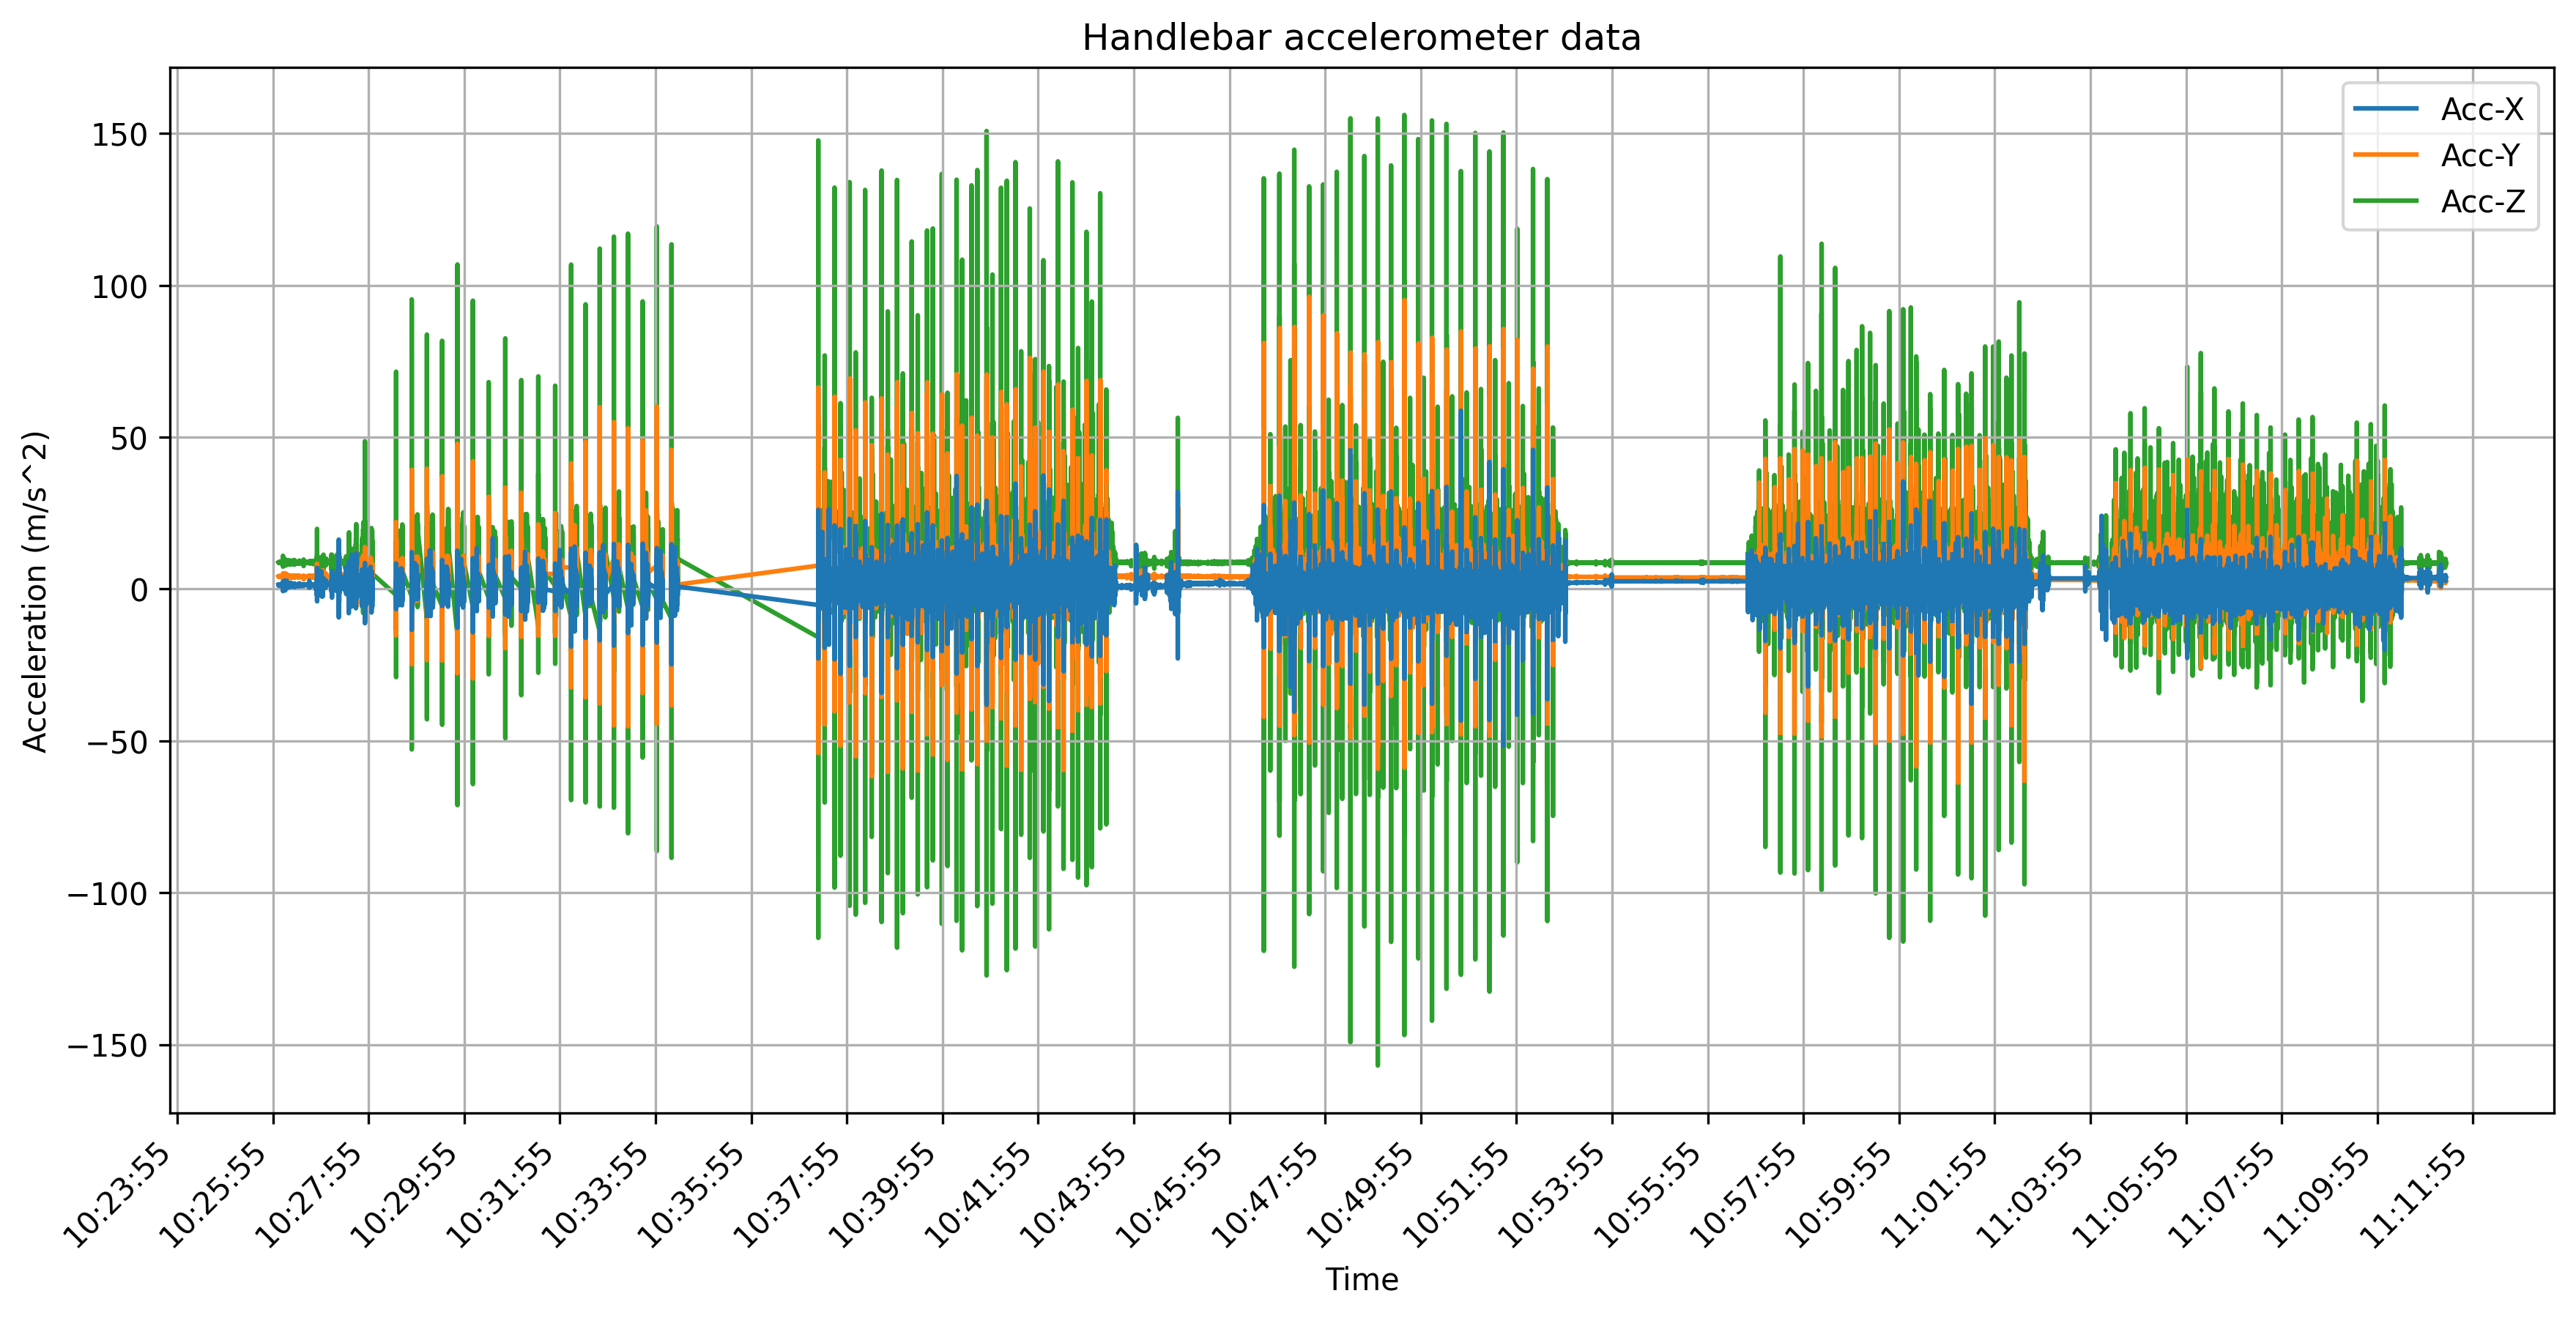

In [7]:
#Show Acc-X,Y,Z if there is a value
plt.figure(figsize=(14, 7), dpi=300)
plt.title('Handlebar accelerometer data')
plt.plot(df.index, df['Acc-X'], label='Acc-X', zorder = 3)
plt.plot(df.index, df['Acc-Y'], label='Acc-Y', zorder = 2)
plt.plot(df.index, df['Acc-Z'], label='Acc-Z', zorder = 1)
plt.legend()
plt.grid()
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45)
# Get the current axes
ax = plt.gca()
#set major ticks every 120 seconds for improved x-axis readability
ax.xaxis.set_major_locator(mdates.SecondLocator(interval=120))
plt.xlabel('Time')
plt.ylabel('Acceleration (m/s^2)')
plt.show()

In [12]:
df[['Acc-X', 'Acc-Y', 'Acc-Z']].describe()
# std: standard deviation.
# 25% (1st quartile): 25% of the data have values below this number. 
# 50% (median): Half the values are below this number. 
# 75% (3rd quartile): 75% of the data are below this number. 

,Acc-X,Acc-Y,Acc-Z
count,464215.000000,464215.000000,465976.000000
mean,1.175621,3.728233,8.946494
std,2.188860,3.121912,6.040047
min,-51.446610,-63.748016,-156.896820
25%,-0.009583,2.700653,7.283157
50%,1.374268,3.806778,8.652649
75%,2.533066,4.611237,10.817001
max,58.729767,96.275650,156.116330


In [13]:
#Missing Values
missing_rows_one = df[df.isnull().any(axis=1)]
#This checks each row for missing values. If any value in a row is True (meaning there's a missing value), .any(axis=1) returns True for that row.
missing_rows_one


,Unnamed: 0,Acc-X,Acc-Y,Acc-Z,Timestamp_unix,curb_activity,curb_scene,curb_height_down,curb_height_up,curb_type_down,curb_type_up,roughness
NTP,,,,,,,,,,,,
2024-07-24 10:27:50.309,21827,NaN,NaN,-7.311890,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
2024-07-24 10:27:50.326,21832,NaN,NaN,-0.421387,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
2024-07-24 10:27:50.435,21855,NaN,NaN,4.558563,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
2024-07-24 10:27:50.454,21860,NaN,NaN,1.422150,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
2024-07-24 10:27:50.534,21877,NaN,NaN,9.816223,1.721817e+12,1.0,1.0,1.0,3.0,1.0,2.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24 11:10:11.220,535083,NaN,NaN,2.236191,1.721819e+12,1.0,1.0,3.0,1.0,2.0,1.0,0.0
2024-07-24 11:10:11.240,535088,NaN,NaN,18.195938,1.721819e+12,1.0,1.0,3.0,1.0,2.0,1.0,0.0
2024-07-24 11:10:11.300,535101,NaN,NaN,14.595047,1.721819e+12,1.0,1.0,3.0,1.0,2.0,1.0,0.0


In [14]:
missing_values_one_sum = df.isnull().sum()
missing_values_one_sum

Unnamed: 0             0
Acc-X               1761
Acc-Y               1761
Acc-Z                  0
Timestamp_unix         0
curb_activity          0
curb_scene             0
curb_height_down       0
curb_height_up         0
curb_type_down         0
curb_type_up           0
roughness              0
dtype: int64